<a href="https://colab.research.google.com/github/nikmaistros-rgb/kap/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_CyberThreatHunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-715962837.py:37: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Accuracy: 0.9995084442259752
Precision: 0.9605263157894737
Recall: 0.7448979591836735
F1-score: 0.8390804597701149


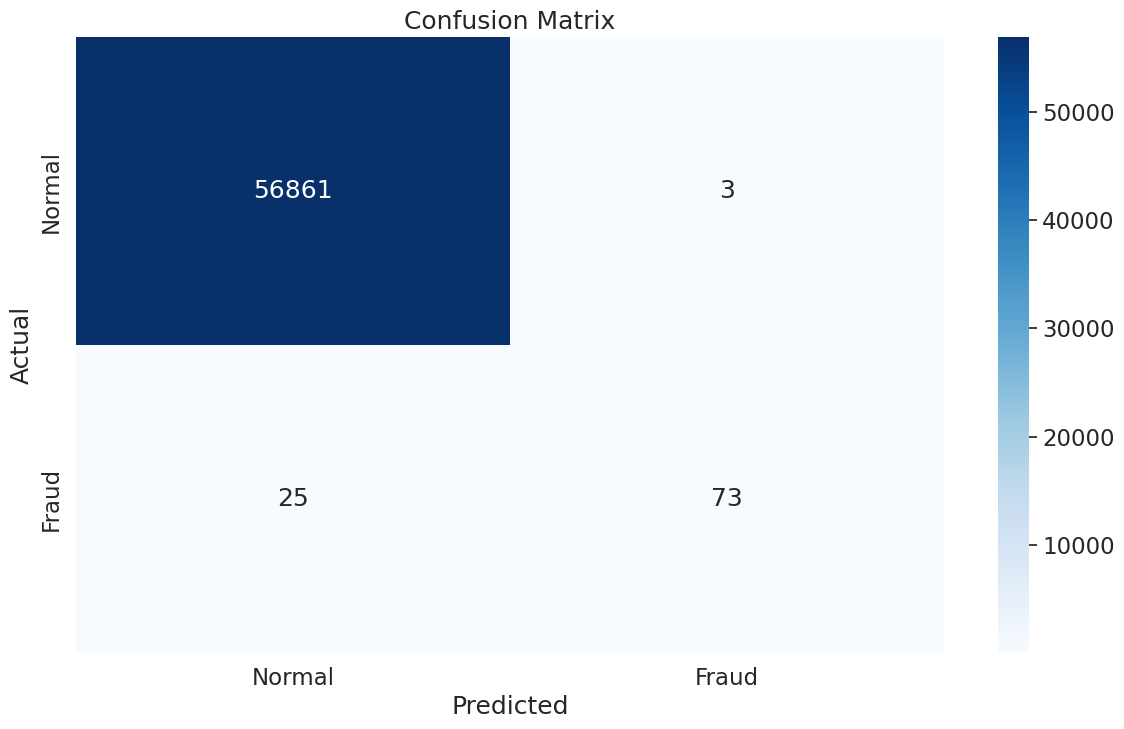

In [ ]:

# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop("Class", axis=1)
y = data["Class"]


# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)


# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# δημιουργία Random Forest αλγορίθμου
model = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_SEED,
    class_weight="balanced"   # σημαντικό λόγω ανισορροπίας κλάσεων
)


# εκπαίδευση αλγόριθμου
model.fit(X_train, y_train)

# πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(X_test)

# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)

# Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



